# Stock price prediction using LSTM

In [42]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [43]:
symbol_stock_data = pd.read_csv('BARUN.csv')
symbol_stock_data.head()

,Date,Symbol,Open,High,Low,Close,Vol
0,1/3/2016,BARUN,271.0,271.0,261.0,267.0,1230
1,1/4/2016,BARUN,267.0,280.0,266.0,276.0,1050
2,1/5/2016,BARUN,276.0,281.0,270.0,277.0,1690
3,1/6/2016,BARUN,277.0,285.0,270.0,280.0,1580
4,1/7/2016,BARUN,280.0,283.0,270.0,283.0,1060


In [65]:
symbol_stock_data.tail()

,Open,Close
Date,,
2022-04-06,0.550835,0.519288
2022-04-07,0.540212,0.520772
2022-04-11,0.545524,0.505935
2022-04-12,0.525038,0.502967
2022-04-13,0.506829,0.514837


In [44]:
symbol_stock_data.shape

(1340, 7)

In [45]:
symbol_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1340 non-null   object 
 1   Symbol  1340 non-null   object 
 2   Open    1340 non-null   float64
 3   High    1340 non-null   float64
 4   Low     1340 non-null   float64
 5   Close   1340 non-null   float64
 6   Vol     1340 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 73.4+ KB


In [46]:
symbol_stock_data.isnull().sum()

Date      0
Symbol    0
Open      0
High      0
Low       0
Close     0
Vol       0
dtype: int64

In [47]:
symbol_stock_data = symbol_stock_data[['Date','Open','Close']] # Extracting required columns
symbol_stock_data['Date'] = pd.to_datetime(symbol_stock_data['Date'].apply(lambda x: x.split()[0])) # Selecting only date
symbol_stock_data.set_index('Date',drop=True,inplace=True) # Setting date column as index
symbol_stock_data.head()

,Open,Close
Date,,
2016-01-03,271.0,267.0
2016-01-04,267.0,276.0
2016-01-05,276.0,277.0
2016-01-06,277.0,280.0
2016-01-07,280.0,283.0


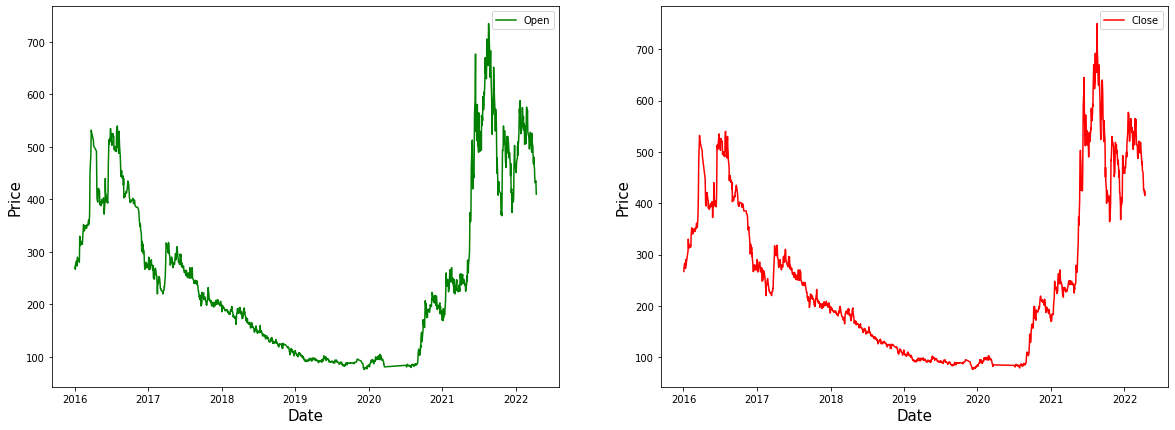

In [48]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(symbol_stock_data['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(symbol_stock_data['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

**Data Pre-Processing**

In [49]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
symbol_stock_data[symbol_stock_data.columns] = MMS.fit_transform(symbol_stock_data)

In [50]:
symbol_stock_data.shape

(1340, 2)

In [51]:
training_size = round(len(symbol_stock_data) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

1072

In [52]:
train_data = symbol_stock_data[:training_size]
test_data  = symbol_stock_data[training_size:]

train_data.shape, test_data.shape

((1072, 2), (268, 2))

In [53]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [54]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [55]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((1022, 50, 2), (1022, 2), (218, 50, 2), (218, 2))

In [56]:
shape_of_test = test_seq.shape
pass_shape_of_test = shape_of_test[0]
print(pass_shape_of_test)

218


**Creating LSTM model**

In [57]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [58]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 50)            10600     
                                                                 
 dropout_1 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/80
32/32 [==============================] - 5s 56ms/step - loss: 0.0101 - mean_absolute_error: 0.0602 - val_loss: 0.0084 - val_mean_absolute_error: 0.0725
Epoch 2/80
32/32 [==============================] - 1s 30ms/step - loss: 8.8167e-04 - mean_absolute_error: 0.0194 - val_loss: 0.0076 - val_mean_absolute_error: 0.0689
Epoch 3/80
32/32 [==============================] - 1s 31ms/step - loss: 6.5934e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0073 - val_mean_absolute_error: 0.0684
Epoch 4/80
32/32 [==============================] - 1s 31ms/step - loss: 6.6479e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0069 - val_mean_absolute_error: 0.0664
Epoch 5/80
32/32 [==============================] - 1s 30ms/step - loss: 6.2968e-04 - mean_absolute_error: 0.0153 - val_loss: 0.0068 - val_mean_absolute_error: 0.0641
Epoch 6/80
32/32 [==============================] - 1s 30ms/step - loss: 5.5418e-04 - mean_absolute_error: 0.0144 - val_loss: 0.0068 - val_mean_absolute_error: 0.0635
Ep

Epoch 50/80
32/32 [==============================] - 1s 30ms/step - loss: 2.4393e-04 - mean_absolute_error: 0.0100 - val_loss: 0.0023 - val_mean_absolute_error: 0.0366
Epoch 51/80
32/32 [==============================] - 1s 31ms/step - loss: 2.2523e-04 - mean_absolute_error: 0.0095 - val_loss: 0.0024 - val_mean_absolute_error: 0.0372
Epoch 52/80
32/32 [==============================] - 1s 32ms/step - loss: 2.0974e-04 - mean_absolute_error: 0.0094 - val_loss: 0.0024 - val_mean_absolute_error: 0.0373
Epoch 53/80
32/32 [==============================] - 1s 31ms/step - loss: 2.3666e-04 - mean_absolute_error: 0.0097 - val_loss: 0.0022 - val_mean_absolute_error: 0.0355
Epoch 54/80
32/32 [==============================] - 1s 31ms/step - loss: 2.1161e-04 - mean_absolute_error: 0.0094 - val_loss: 0.0027 - val_mean_absolute_error: 0.0398
Epoch 55/80
32/32 [==============================] - 1s 31ms/step - loss: 2.3573e-04 - mean_absolute_error: 0.0100 - val_loss: 0.0021 - val_mean_absolute_error:

In [89]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

array([[0.32195434, 0.30959505],
       [0.3496168 , 0.33584213],
       [0.39189038, 0.37591127],
       [0.43636033, 0.41834483],
       [0.4505223 , 0.43245828]], dtype=float32)

In [90]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[288.1679 , 284.66705],
       [306.39746, 302.3576 ],
       [334.25577, 329.3642 ],
       [363.56146, 357.9644 ],
       [372.8942 , 367.4769 ]], dtype=float32)

**Visualizing predicted and actual data**

In [91]:
# Merging actual and predicted data for better visualization

symbol_slic_data = pd.concat([symbol_stock_data.iloc[-pass_shape_of_test:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=symbol_stock_data.iloc[-pass_shape_of_test:].index)], axis=1)

In [92]:
symbol_slic_data[['Open','Close']] = MMS.inverse_transform(symbol_slic_data[['Open','Close']]) # Inverse scaling

In [93]:
symbol_slic_data.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2021-05-16,300.0,324.0,288.167908,284.667053
2021-05-17,324.0,356.0,306.397461,302.357605
2021-05-18,373.0,373.0,334.255768,329.364197
2021-05-19,375.0,357.0,363.561462,357.964386
2021-05-20,357.0,366.0,372.894196,367.476898


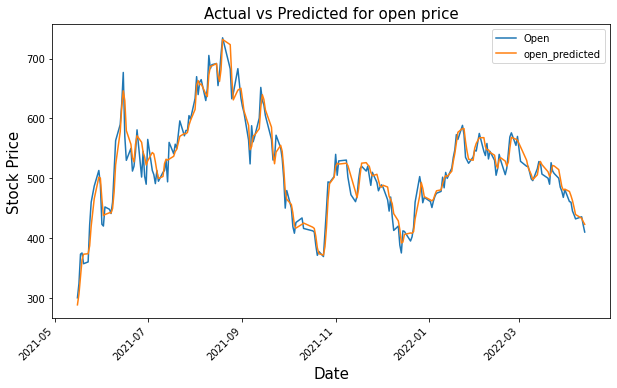

In [94]:
symbol_slic_data[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

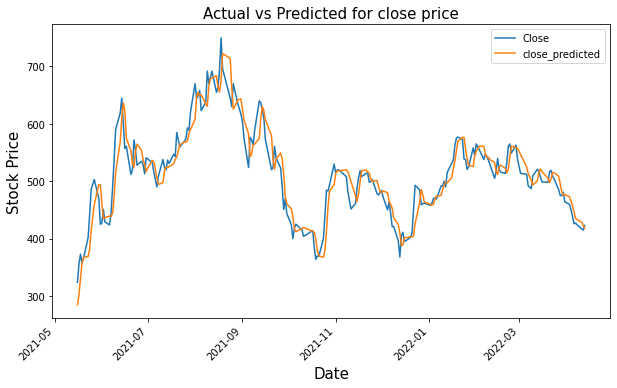

In [95]:
symbol_slic_data[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

**Predicting upcoming 10 days**

In [96]:
symbol_slic_data.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2021-05-16,300.0,324.0,288.167908,284.667053
2021-05-17,324.0,356.0,306.397461,302.357605
2021-05-18,373.0,373.0,334.255768,329.364197
2021-05-19,375.0,357.0,363.561462,357.964386
2021-05-20,357.0,366.0,372.894196,367.476898


In [97]:
# Creating a dataframe and adding 10 days to existing index 

symbol_slic_data = symbol_slic_data.append(pd.DataFrame(columns=symbol_slic_data.columns,index=pd.date_range(start=symbol_slic_data.index[-1], periods=11, freq='D', closed='right')))

In [98]:
symbol_slic_data.shape

(228, 4)

In [101]:
symbol_slic_data['2022-04-01':'2022-04-14']


,Open,Close,open_predicted,close_predicted
2022-04-03,461.0,460.0,477.903137,472.945496
2022-04-04,460.0,450.9,470.89621,465.958801
2022-04-05,445.1,439.0,462.519623,457.691132
2022-04-06,439.0,426.0,451.460175,446.830444
2022-04-07,432.0,427.0,439.301483,434.90036
2022-04-11,435.5,417.0,433.098328,428.697968
2022-04-12,422.0,415.0,427.489655,423.058868
2022-04-13,410.0,423.0,422.891052,418.401978
2022-04-14,NaN,NaN,NaN,NaN


In [105]:
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=symbol_slic_data.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [106]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

In [109]:
upcoming_prediction[['Open','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])

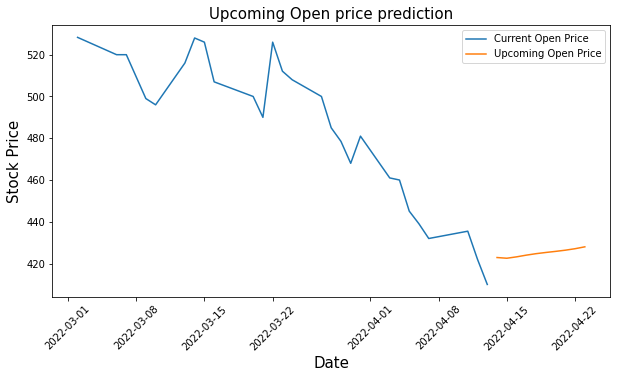

In [118]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(symbol_slic_data.loc['2022-03-01':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2022-04-14':,'Open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fg.show()

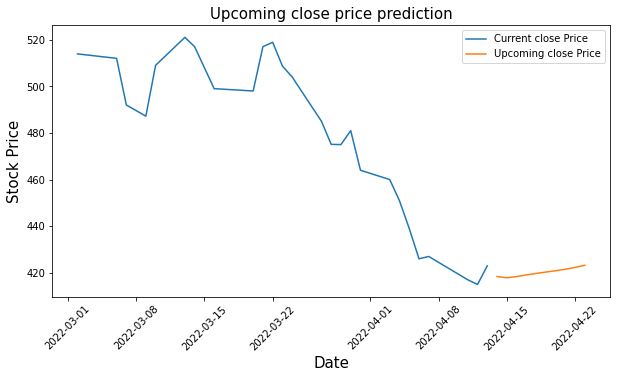

In [116]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(symbol_slic_data.loc['2022-03-01':,'Close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2022-04-13':,'Close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fg.show()

In [121]:
model_json = model.to_json()
with open("symbol_stock_model.json", "w") as json_file:
  json_file.write(model_json)

model.save_weights("symbol_stock_model.h5")